In order to use the GOGREEN class in a notebook, you must first import and instantiate the class using the following code: 

In [2]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    # Import
    %run "C:/Users/panda/Documents/Github/GOGREEN-Research/Code/GOGREEN.py"

    # Instantiate
    gg = GOGREEN( 'C:/Users/panda/Desktop/GOGREEN_Working/')

Note that the first three lines of the above are optional, and have been included for legibility purposes. Due to some legacy code that is a holdover from the original project, any calls to the GOGREEN class will through some number of deprecation warnings that can clog up the output. Here and in all examples below I place my code in a "with" block in order to surpress these warnings. In the future the code may benefit from a rework to prevent these deprecation warnings at the source, but I deemed this non-necessary to address during the course of my work on the project. Note that this also seems to surpress Jupyter's automatic output of return values, so if you enjoy this feature you may choose not to use this.

Note also that the import and instantiation rely on two different file locations:

- The first, located at *C:/Users/panda/Documents/Github/GOGREEN-Research/Code/GOGREEN.py*, contains the class definition. 

- The second, located at *C:/Users/panda/Desktop/GOGREEN_Working/*, contains the working directory of the GOGREEN survey, to be accessed by the class at instantiation in order to build the class' catalogs. This file path is the only mandatory parameter for the constructor (class instantiation method) GOGREEN(). 

It can take several minutes for the above code to run, as by default, instantiation sees the creation not only of the entire merged catalog of survey data, but also the calculation and storage of many additional fields used in the class. 

For this reason, if you are working in a notebook in which you have already instantiated the class and need to reinstantiate to reflect new changes to the class file, I recommend utilizing the other parameter of the constructor, param:priorCatalog, as shown below to tell it to not recompile the catalog. This will cut the instantiation time to be almost zero.

In [3]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    # Import
    %run "C:/Users/panda/Documents/Github/GOGREEN-Research/Code/GOGREEN.py"

    # Instantiate
    gg = GOGREEN( 'C:/Users/panda/Desktop/GOGREEN_Working/', priorCatalog=gg.catalog)

Note that this will not be a viable option if any changes made to the class file will impact the content of the catalog constructed at instantiation.

Beyond the constructor, the GOGREEN class has four methods that are intended to be called by the end user:

- plot()
- compTrends()
- testPlots()
- evalLineFit()

The Plot method is the only of these methods created as part of Christian Harris' original class, and as such was designed to be the end-all be-all for user interface to the class, being an easily extensible tool for constructing scatter plots of any two characteristics of the data contained within the class as x vs y.

The method still serves the same purpose in my modified version of the class, and though the code itself has undergone drastic changes, from a user's perspective the method can be thought of merely as having been extended in its functionality as envisioned in the original design.

To call the method, a minimum of three parameters must be supplied:

- :param xQuantityName:      Name of the catalog column whose values are to be used as the x
- :param yQuantityName:      Name of the catalog column whose values are to be used as the y
- :param plotType:           How to plots should be generated
                                    Value: 1 - plot only the cluster provided in param:clusterName
                                    Value: 2 - plot all the clusters on seperate plots (subplot)
                                    Value: 3 - plot all the clusters on a single plot



To view all catalog columns that can be plotted as either x or y with plot(), run the following:

In [5]:
print(gg.catalog.columns.to_list())

['Cluster', 'cPHOTID', 'SPECID', 'ra', 'dec', 'zspec', 'Redshift_Quality', 'zphot', 'zphot_l68', 'zphot_u68', 'UMINV', 'VMINJ', 'Star', 'K_flag', 'totmask', 'Mstellar', 'u_tot', 'g_tot', 'r_tot', 'i_tot', 'z_tot', 'y_tot', 'V_tot', 'B_tot', 'J_tot', 'H_tot', 'K_tot', 'Ks_tot', 'IRAC1_tot', 'IRAC2_tot', 'IRAC3_tot', 'IRAC4_tot', 'IA484_tot', 'IA527_tot', 'IA624_tot', 'IA679_tot', 'IA738_tot', 'IA767_tot', 'IB427_tot', 'IB464_tot', 'IB505_tot', 'IB574_tot', 'IB709_tot', 'IB827_tot', 'fuv_tot', 'nuv_tot', 'mips24_tot', 'eu_tot', 'eg_tot', 'er_tot', 'ei_tot', 'ez_tot', 'ey_tot', 'eV_tot', 'eB_tot', 'eJ_tot', 'eH_tot', 'eK_tot', 'eKs_tot', 'eIRAC1_tot', 'eIRAC2_tot', 'eIRAC3_tot', 'eIRAC4_tot', 'eIA484_tot', 'eIA527_tot', 'eIA624_tot', 'eIA679_tot', 'eIA738_tot', 'eIA767_tot', 'eIB427_tot', 'eIB464_tot', 'eIB505_tot', 'eIB574_tot', 'eIB709_tot', 'eIB827_tot', 'efuv_tot', 'enuv_tot', 'emips24_tot', 'ltau', 'metal', 'lage', 'Av', 'lmass', 'lsfr', 'lssfr', 'la2t', 'chi2', 'FUV', 'NUV', 'U', 'V

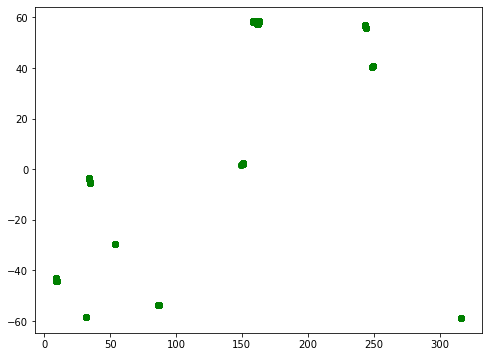

In [8]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot(xQuantityName='ra', yQuantityName='dec', plotType=3)

The above is a simple example of the plot() method being called to plot all data points in the GOGREEN survey as a function of right ascension vs declination. 

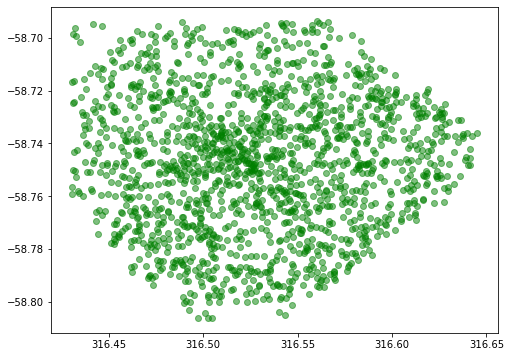

In [10]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot(xQuantityName='ra', yQuantityName='dec', plotType=1, clusterName='SPT2106')

Above we see the same RA vs DEC plot, but exclusively for the cluster SPT2106. Note that whenever param:plotType is set to 1, param:clusterName must also be provided.

<Figure size 576x432 with 0 Axes>

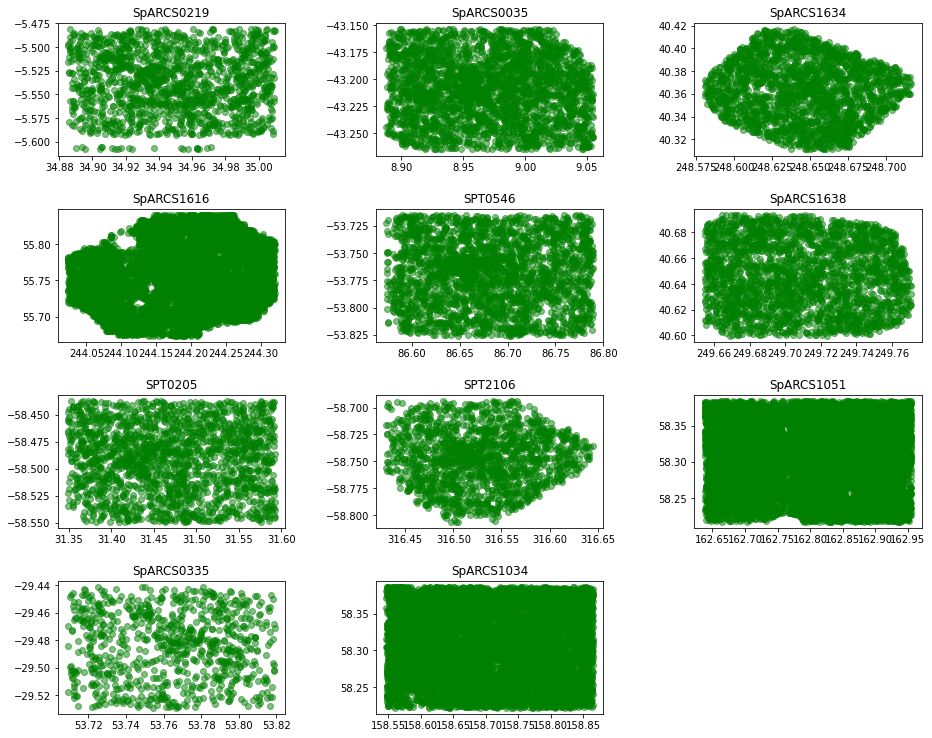

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot(xQuantityName='ra', yQuantityName='dec', plotType=2)

The above set of subplots show the same RA vs DEC plot for each of the 11 GOGREEN clusters used in this class due to their having structural parameters

Since it is not particularly useful to plot ALL data included in the survey, there are two optional parameters (to be used in tandem with standard search criteria) that enable the user to specify what data should be treated as 'good' data and therefore should be plotted:

- :param useMembers:        Flag to indicate whether only cluster members should be plotted or only non-members should be plotted.
                                    Default: 'only' - only members
                                    Value:   'not' - only non-members
                                    Value:   'all' - no restriction imposed
- :param useStandards:       Flag to indicate whether the standard search criteria should be applied
                                    Default: True

The standard search criteria, which can be toggled with param:useStandards, will be the main interface for data cuts, whereas useMembers is only a shorthand option since the distinction between members and non-members is one of the most common cuts to be made for the project this class was adapted to handle.

Note that the concept of 'good' data is not relegated only to quality cuts. If you need to plot only passive galaxies, for example, you should specify that in the standard search criteria as well. If you need to make several plots in a row with different standard search criteria, you will need to redefine the standard search criteria before each plot() call.

In [12]:
gg.standardCriteria = [
            'Star == 0',
            'K_flag < 4',
            'Mstellar > 10**9.8',
            '(1 < zspec < 1.5) or ((((Redshift_Quality != 3) and (Redshift_Quality != 4)) or (SPECID < 0)) and (1 < zphot < 1.5))',
            'cluster_id <= 12',
            'totmask == 0',
            'Fit_flag > 2',
            'n < 6',
            'HSTFOV_flag == 1',
            're > 0'
]

The above code shows how to set standard search criteria prior to a call to plot(). All criteria given should reflect specifications in catalog parameters for a catalog object, and should follow the syntax shown above.

<Figure size 576x432 with 0 Axes>

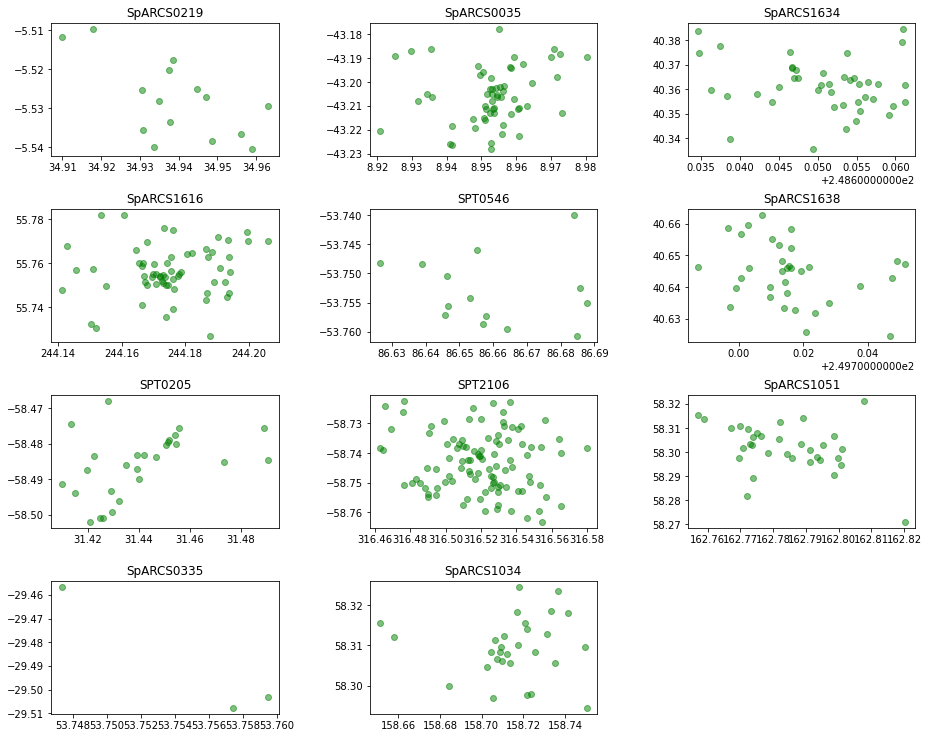

In [14]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot(xQuantityName='ra', yQuantityName='dec', plotType=2, useMembers='only')

The above subplots show again the RA vs DEC of the 11 clusters with structural parameters, this time with standard search criteria set (the parameter does not need to be specified because standard search criteria is used by default if set) and only members being specified with param:useMembers.

The following parameters are included as a means to alter/improve the appearance of plots made with plot():

- :param colorType:          Specifies how to color code the plotted galaxies
                                    Default: None
                                    Value:   'catalog' - spectroscopic vs photometric catalog source
                                    Value:   'passive' - passive vs star forming
                                    Value:   'sersic' -  elliptical vs spiral
                                    Value:   'environment' - cluster vs field
- :param colors:             Specifies what colors should be used when plotting
                                    Default: None - default colors are used
                                    Value:   [(r,g,b), (r,g,b)]
- :param xRange:             List containing the desired lower and upper bounds for the x-axis
                                    Default: None
- :param yRange:             List containing the desired lower and upper bounds for the y-axis
                                    Default: None
- :param xLabel:             Label to put on the x-axis
                                    Default: Empty string
- :param yLabel:             Label to put on the y-axis
                                    Default: Empty string
- :param useLog:             Flag to indicate whether the x- or y-axis should be in log scale
                                    Default: [False,False] - neither axis in log scale
                                    Value:   [False,True] - y axis in log scale
                                    Value:   [True,False] - x axis in log scale
                                    Value:   [True,True] - both axis in log scale

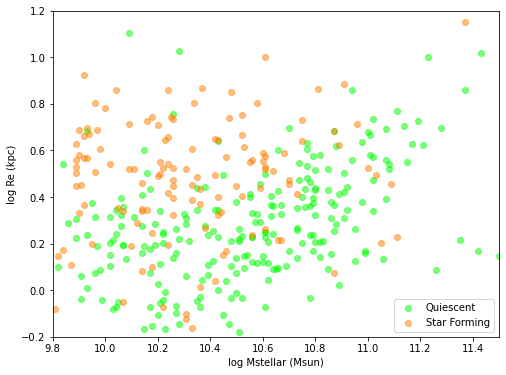

In [16]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', 
            colorType='passive', colors=[(0,1,0),(1,0.5,0)],
            xLabel='log Mstellar (Msun)', yLabel='log Re (kpc)', 
            xRange=[9.8,11.5], yRange=[-0.2,1.2],
            useLog=[True,True])

The above stellar mass vs effective radius (member galaxies) plot illustrates the use of all seven visual parameters described above, with axis range limits, axis labels, user-specified green and orange colors, categorization based on SFR (includes a legend), and use of log scale.

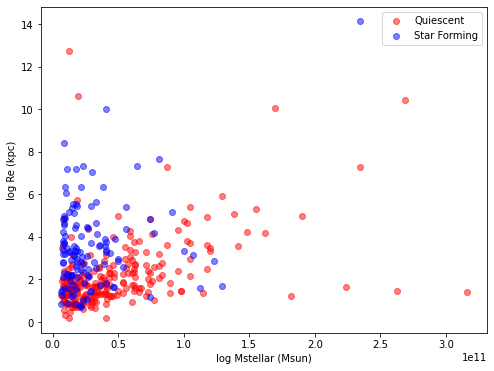

In [19]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', 
            colorType='passive', 
            xLabel='log Mstellar (Msun)', yLabel='log Re (kpc)')

The above plot showcases the same data as the previous plot, but with default colors, without axis range limits, and in linear space

Lastly, there are four parameters I have added to the class to allow for plotting of additional information alongside the data:

- :param fitLine:            Flag to indicate whether a best fit line should be fit to the data. By default this line will plot size vs mass. 
                                    Default: False
- :param bootstrap:           Flag to indicate rather bootstrapping should be used to calculate and display uncertainty on the fit 
                                    Default: True
- :param plotErrBars:         Flag to indicate whether individual galaxies should have their Re error plotted
                                    Default: False
- :param plotTransitionType:  Allows for plotting a third category of data alongside two others (intended for use alongside 'passive' color type
                                    Default: None
                                    Value: GV - plot green valley trend
                                    Value: BQ - plot blue quiescent trend    
                                    Value: PSB - plot post-starburst trend                     

Quiescent count: 239
Star Forming count: 128


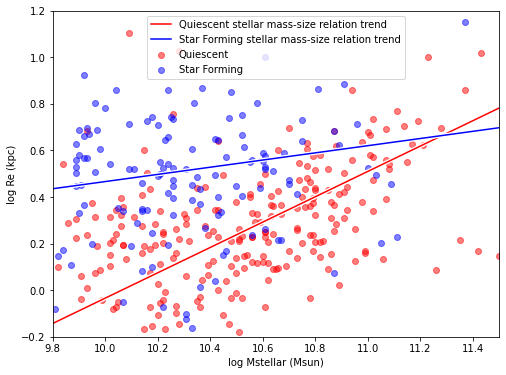

In [22]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', 
            colorType='passive',
            xLabel='log Mstellar (Msun)', yLabel='log Re (kpc)', 
            xRange=[9.8,11.5], yRange=[-0.2,1.2],
            useLog=[True,True],
            fitLine=True, bootstrap=False)

The above plot demonstrates the stellar mass vs effective radius of quiescent and star-forming member galaxies in the survey with the trendlines calculated for these populations

Quiescent count: 239
Star Forming count: 128


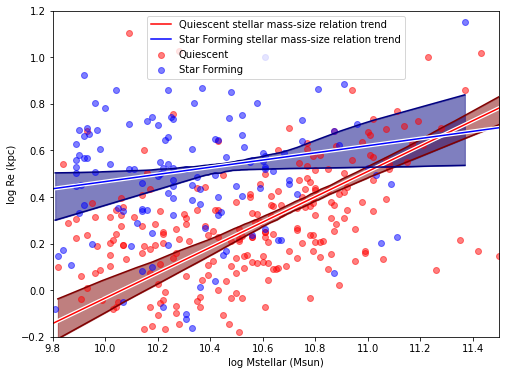

In [23]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', 
            colorType='passive',
            xLabel='log Mstellar (Msun)', yLabel='log Re (kpc)', 
            xRange=[9.8,11.5], yRange=[-0.2,1.2],
            useLog=[True,True],
            fitLine=True)

Above is the same plot as previous, only param:bootstrap is not set to False, meaning bootstrap uncertainties are shown (as they are by default)

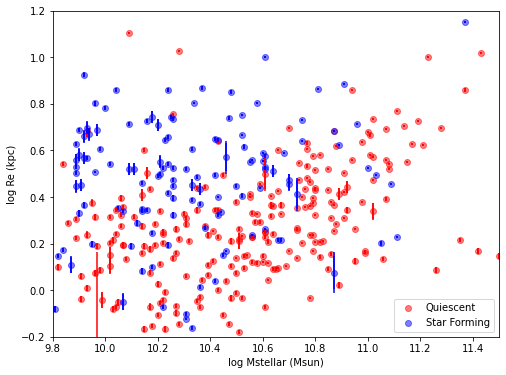

In [24]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', 
            colorType='passive',
            xLabel='log Mstellar (Msun)', yLabel='log Re (kpc)', 
            xRange=[9.8,11.5], yRange=[-0.2,1.2],
            useLog=[True,True],
            plotErrBars=True)

Above the same data is shown with individual error bars on data points

Quiescent count: 239
Star Forming count: 128
Green Valley count: 53


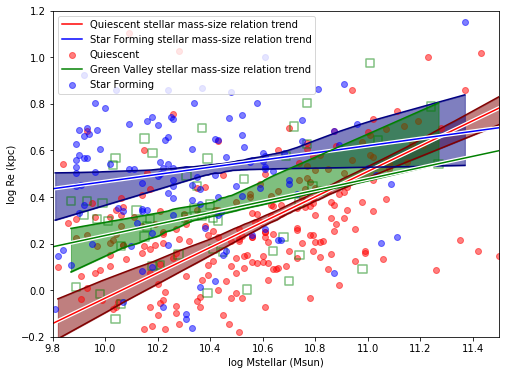

In [25]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', 
            colorType='passive',
            xLabel='log Mstellar (Msun)', yLabel='log Re (kpc)', 
            xRange=[9.8,11.5], yRange=[-0.2,1.2],
            useLog=[True,True],
            fitLine=True,
            plotTransitionType='GV')

Above the same data is shown with the additional inclusion of the green valley population categorization. Trendlines and bootstrap uncertainties are shown as well. Note that in the current iteration of the class, the trendline for the transition type will be displayed regardless of whether param:fitLine is set to True (setting param:bootstrap to false will still have the intended effect however). This minor oversight can be corrected as needed.